**linear regression on adipose tissue prediction**

In [30]:
import pandas as pd #imorting pandas for data manipulation
from google.colab import drive #import drive for csv file 
drive.mount('/content/drive', force_remount=True) 
data = pd.read_csv("/content/WC_AT.csv") # reading path of csv file
data.head()

Mounted at /content/drive


,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [31]:
data.shape

(109, 2)

# **checking the corrrelation between two columns**

In [32]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


as we can see this is highly positive corrrelated 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


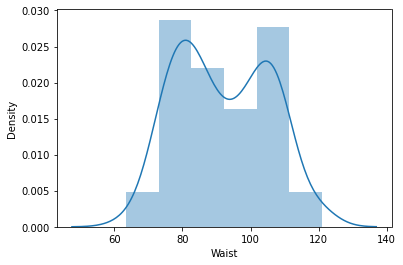

In [33]:
import seaborn as sns
sns.distplot(data['Waist'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


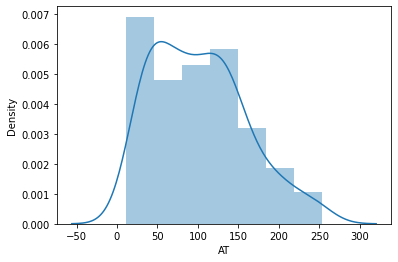

In [34]:
sns.distplot(data['AT'])


# **APPLYING LINEAR REGGRESSION MODEL**

In [45]:
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = data).fit()#this will fit the line in scatter plot 

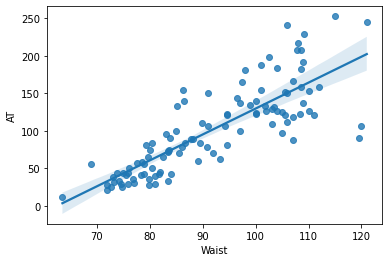

In [46]:
sns.regplot(x="Waist", y="AT", data=data);

In [37]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [38]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [39]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.670036893052843, 0.6669531256981966)

Now predicting new data point for adipose tissue

In [40]:
#Predict for 90 and 100 waist circumference
newdata=pd.Series([90,100])

In [41]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])

In [42]:
model.predict(data_pred)

0     95.315857
1    129.904451
dtype: float64

***end***